**INTRODUCTION AND PROJECT OVERVIEW**

The aim of this project is to explore the dataset about westbound traffic on the I-94 Interstate Highway and determine a few indicators of heavy traffic on the highway. The dataset was made available by John Hogue and is available at the UCI Machine learning repository.

The data can be found using this link:

https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume

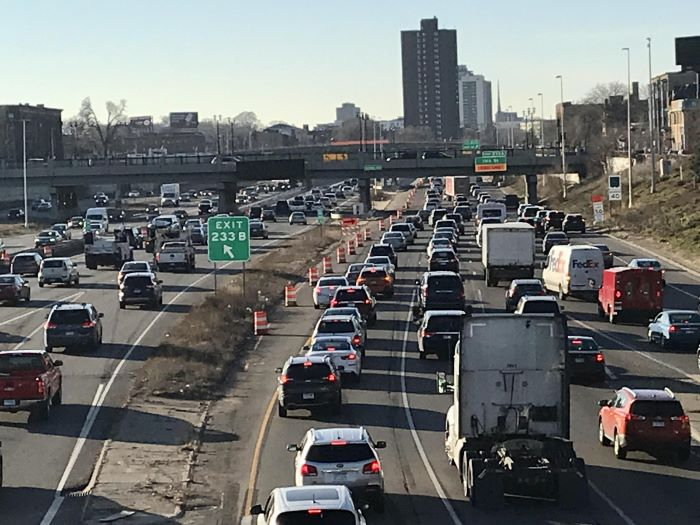

**Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

**DATA INSPECTION**

In [3]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


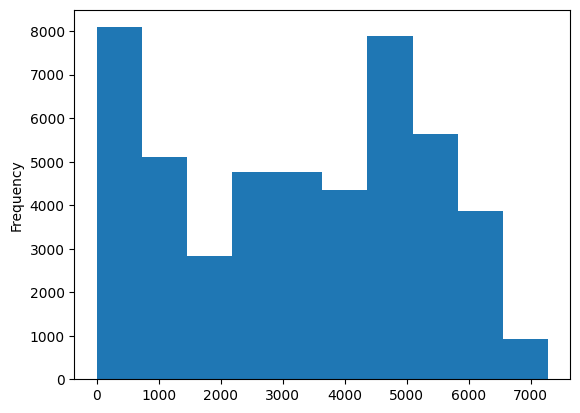

In [6]:
traffic["traffic_volume"].plot.hist()
plt.show()

In [7]:
traffic["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

For the period of time captured in the dataframe (02/10/2012 to 30/09/2018), the average hourly flow of westbound traffic on the i-94 highway involved approximately 3260 cars. The most number of cars recorded in westbound traffic was 7280.

25% of traffic scenarios involved only 1193 cars however another 25% of traffic scenarios involved 4933 cars. It may be interesting to investigate how time affects the flow of traffic.

**Exploring time and traffic flow**

The datetime column of the dataset will need to be modified to make analysis easier. I will split the dataset into daytime data (traffic flow from 7AM to 7PM) and nightime data (from 7PM to 7AM)

In [8]:
traffic["date_time"] = pd.to_datetime(traffic["date_time"])

day_traffic = traffic.copy()[(traffic["date_time"].dt.hour >= 7) & (traffic["date_time"].dt.hour < 19)]
night_traffic = traffic.copy()[(traffic["date_time"].dt.hour >= 19) | (traffic["date_time"].dt.hour < 7)]

print(day_traffic.shape)
print(night_traffic.shape)

(23877, 9)
(24327, 9)


Below, I will plot histograms comparing the flow of daytime and nightime traffic.

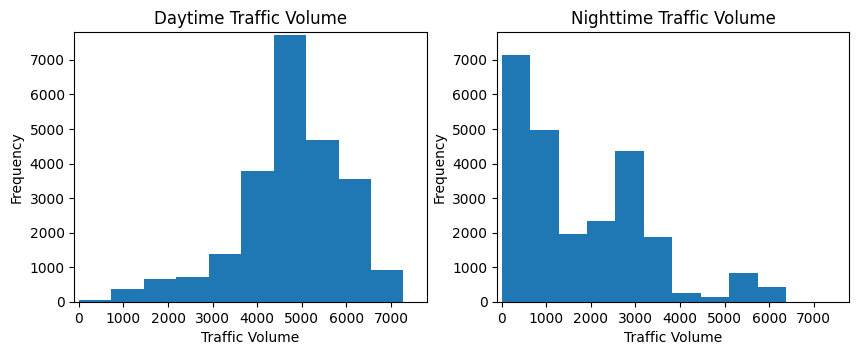

In [9]:
plt.figure(figsize=(10,3.5))
plt.subplot(1,2,1)
plt.hist(day_traffic["traffic_volume"])
plt.title("Daytime Traffic Volume")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.xlim(-100,7800)
plt.ylim(0, 7800)

plt.subplot(1,2,2)
plt.hist(night_traffic["traffic_volume"])
plt.title("Nighttime Traffic Volume")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.xlim(-100, 7800)
plt.ylim(0, 7800)

plt.show()

When comparing the distribution of daytime traffic volume and nighttime traffic volume, the histograms show that daytime traffic volume is skewed left while nighttime traffic distribution is skewed right. This means that daytime traffic typically has a higher volume while nighttime traffic typically has a lower volume.

We may be able to get more information about day and night traffic volume by using the describe function.

In [10]:
day_traffic["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [11]:
night_traffic["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The mean traffic flow at night, stands at approximately 1785 and is 4762 in the day. Additionally, the Inter Quartile Ranges for traffic flow in the day are all significantly higher than those for the night. Thus, the describe function supports the information gotten from observing the shape of the histograms displayed above.

Since the goal of the project is to analyse causes of HEAVY traffic flow, it is wiser to focus on the daytime traffic dataset since traffic flow at light is usually light.

**Month vs Traffic Flow**

Since it is clear that the time of the day affects the flow of westbound traffic on the highway, it may be worth it to check if the month of the year also has any relationship with daytime traffic flow.

In [12]:
day_traffic['month'] = day_traffic['date_time'].dt.month
by_month = day_traffic.groupby('month').mean()
by_month['traffic_volume']

C:\Users\Kelechi\AppData\Local\Temp\ipykernel_16216\3932733314.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_month = day_traffic.groupby('month').mean()


month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

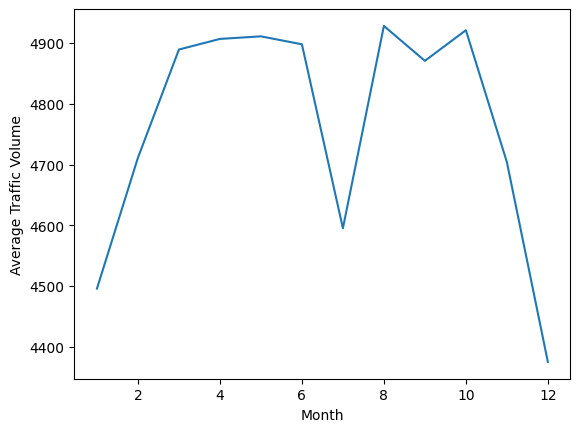

In [13]:
plt.plot(by_month["traffic_volume"])
plt.xlabel("Month")
plt.ylabel("Average Traffic Volume")
plt.show()

The visualization above shows that the average traffic volume reduces during the colder months of the year (November to February). The average traffic volume is typically higher from March to October but the graph above shows that the average traffic flow in July is low.

Considering July is typically the peak of the summer season, this seems abnormal and requires investigation.

C:\Users\Kelechi\AppData\Local\Temp\ipykernel_16216\1665422002.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  july.groupby('year').mean()['traffic_volume'].plot.line()


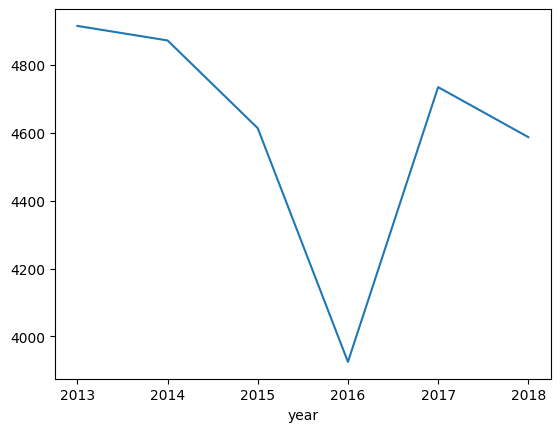

In [14]:
# Exploring the anomalies in July
day_traffic['year'] = day_traffic['date_time'].dt.year
july = day_traffic[day_traffic['month'] == 7]
july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

The line plot aboves shows that the daytime traffic volume in the month of July is typically high except in July 2016. This could be as a result of highway construction or maintenance. This article https://www.mlive.com/news/ann-arbor/2016/06/road_construction_projects_tha.html shows that there was a period of construction on the highway in July 2016.

Thus, it is safe to conclude that the average traffic volume is typically higher in the warmer months than in the colder months of the year.

**Weekdays vs Weekends: How does this affect traffic volume ?**

Now I will explore the relationship between the days of the week and the average volume of traffic.

In [15]:
day_traffic['day_of_week'] = day_traffic['date_time'].dt.dayofweek
day_of_week = day_traffic.groupby('day_of_week').mean()
day_of_week['traffic_volume']  # 0 is Monday, 6 is Sunday

C:\Users\Kelechi\AppData\Local\Temp\ipykernel_16216\3281738819.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  day_of_week = day_traffic.groupby('day_of_week').mean()


day_of_week
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

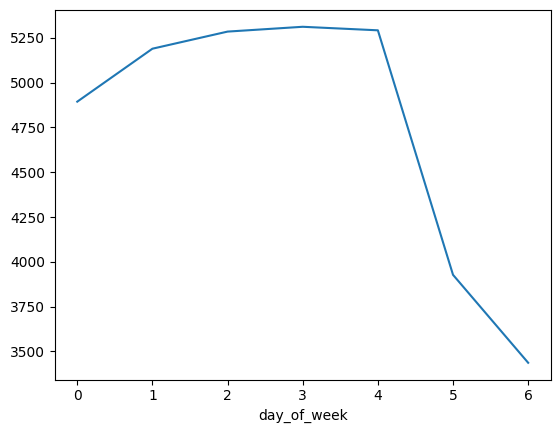

In [16]:
day_of_week["traffic_volume"].plot.line()
plt.show()

The line plot above shows that the volume of traffic is significantly lower on saturdays and sundays than it is on weekdays. Fridays tend to be the peak of westbound traffic on the i-94.

Next step involves analysing how different hours on weekdays and weekends affect traffic volume.

In [17]:
day_traffic['hour'] = day_traffic['date_time'].dt.hour
bussiness_days = day_traffic.copy()[day_traffic['day_of_week'] <= 4] # 4 == Friday
weekend = day_traffic.copy()[day_traffic['day_of_week'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


C:\Users\Kelechi\AppData\Local\Temp\ipykernel_16216\2546589205.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_hour_business = bussiness_days.groupby('hour').mean()
C:\Users\Kelechi\AppData\Local\Temp\ipykernel_16216\2546589205.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_hour_weekend = weekend.groupby('hour').mean()


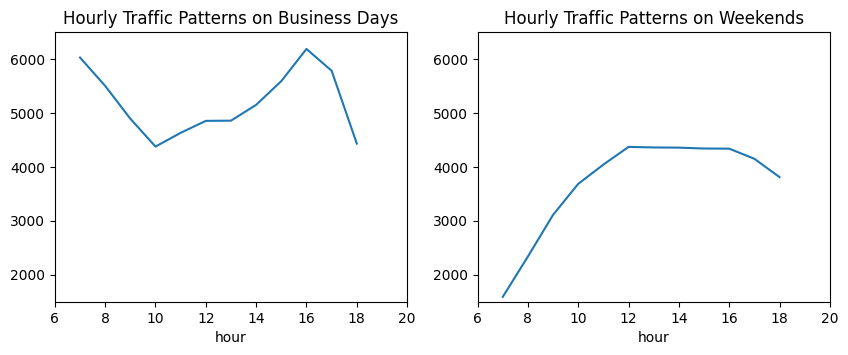

In [18]:
plt.figure(figsize=(10,3.5))

plt.subplot(1,2,1)
by_hour_business["traffic_volume"].plot.line()
plt.title("Hourly Traffic Patterns on Business Days")
plt.xlim(6, 20)
plt.ylim(1500, 6500)

plt.subplot(1,2,2)
by_hour_weekend["traffic_volume"].plot.line()
plt.title("Hourly Traffic Patterns on Weekends")
plt.xlim(6,20)
plt.ylim(1500, 6500)

plt.show()

The line plots above show that on Business days, the peak traffic hours are 7am and 4pm. This makes sense as office hours in the USA tend to begin at 8 or 9 am and ends at 4 or 5pm, thus the spike at these hours could be attributed to workers commute. Traffic flow is typically lowest at 10 am on business days.

On weekends, traffic flow is lowest at 7am and reaches its peak at midday (12pm). This could be because people typically decide to sleep in on weekends.

To summarize the effect of time indicators on westbound traffic flow on the I-94 highway:

Traffic flow is heavier in the day. (Specifically between 07:00 and 19:00)
Traffic flow is typically heavier in the warmer months of the year (March to October) than in the colder months.
Traffic flow is heavier on business days (with peak hours at 07:00 and 16:00) than on weekends.

**Weather and Traffic Flow on the I-94**

The weather is another variable that could have an effect on the flow of traffic on the highway. For this reason, I will be looking into the relationship between weather and westbound traffic on the I-94.

In [19]:
day_traffic.corr()["traffic_volume"]

C:\Users\Kelechi\AppData\Local\Temp\ipykernel_16216\3166061133.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  day_traffic.corr()["traffic_volume"]


temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
day_of_week      -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

As seen from the correlation table produced above, "temp", "rain_1h" and "snow_1h" all have positive correlations with traffic volume with temperature being the strongest. "clouds_all" has a rather weak negative correlation with traffic volume.

Since the "temp" column has the strongest correlation (of all the weather related columns), a scatter plot will be generated to further examine the relationship between both variables.

In [20]:
day_traffic["temp"].describe()

count    23877.000000
mean       282.257596
std         13.298885
min          0.000000
25%        272.680000
50%        283.780000
75%        293.440000
max        310.070000
Name: temp, dtype: float64

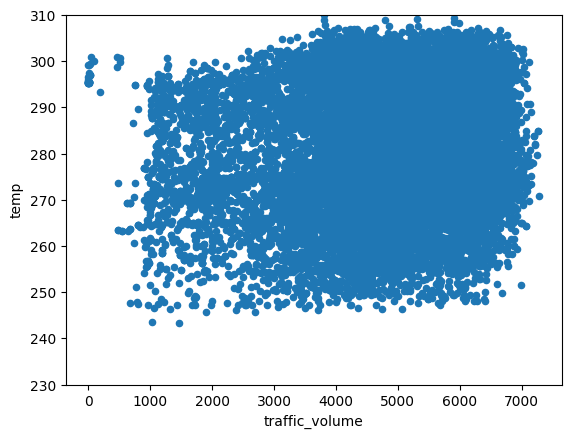

In [21]:
day_traffic.plot.scatter("traffic_volume", "temp")
plt.ylim(230,310)
plt.show()

The scatterplot above shows that temperature is not a strong enough indicator of traffic volume.

**Weather Types and Traffic Volume**

Perhaps exploring different weather types in the dataset could lead to clearer connection between weather and traffic flow.

In [22]:
by_weather_main = day_traffic.groupby('weather_main').mean()
by_weather_description = day_traffic.groupby('weather_description').mean()

C:\Users\Kelechi\AppData\Local\Temp\ipykernel_16216\2641505860.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_weather_main = day_traffic.groupby('weather_main').mean()
C:\Users\Kelechi\AppData\Local\Temp\ipykernel_16216\2641505860.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_weather_description = day_traffic.groupby('weather_description').mean()


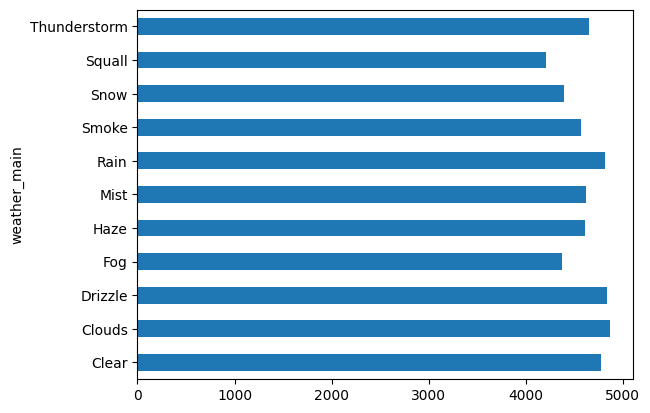

In [23]:
by_weather_main["traffic_volume"].plot.barh()
plt.show()

Westbound traffic volume on the highway seems to be lowest when weather conditions are foggy. This makes sense because of the risk associated with driving in foggy conditions (visibility is typically impaired).

Considering how dangerous it could be driving in foggy conditions, the traffic volume remains high. Perhaps this could be an issue to address for key decision makers in the USA. More awareness should be raised on the dangers of driving in foggy conditions.

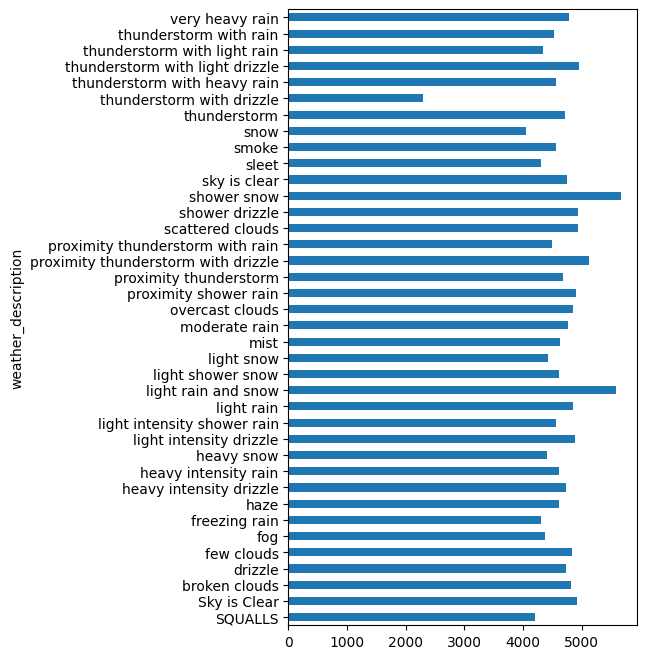

In [24]:
by_weather_description["traffic_volume"].plot.barh(figsize=(4.5,8))
plt.show()

Traffic volume exceeds the 5000 mark when there is light rain and snow, and when there is shower snow. The reason for this is unclear but it could be attributed to the tendency of drivers to drive slower and more carefully during these conditions.

**CONCLUSION AND KEY TAKEAWAY**

All the insight derived applies exclusively to the WESTBOUND flow of traffic on the I-94 Highway.

- Traffic flow is heavier in the day. (Specifically between 07:00 and 19:00)
- Traffic flow is typically heavier in the warmer months of the year (March to October) than in the colder months.
- Traffic flow is heavier on business days (with peak hours at 07:00 and 16:00) than on weekends.
- Traffic flow is lowest when there are foggy conditions.
- Even in foggy conditions, the traffic volume remains very high and this could be dangerous as visibility is impaired in foggy conditions.
- Key decisions makers in the USA should make more of an effort to highlight the dangers of driving in foggy conditions in a bid to reduce highway accidents (which ultimately affects traffic volume).
- Traffic volume is typically higher than 5000 when there is light rain and snow or when there is shower snow.